In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
# from skleran.dataset import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [4]:
df = pd.read_csv(r"C:\Users\shukla\Downloads\archive (3).zip")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df.shape

(506, 14)

In [7]:
df.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0

In [8]:
df.tail

<bound method NDFrame.tail of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


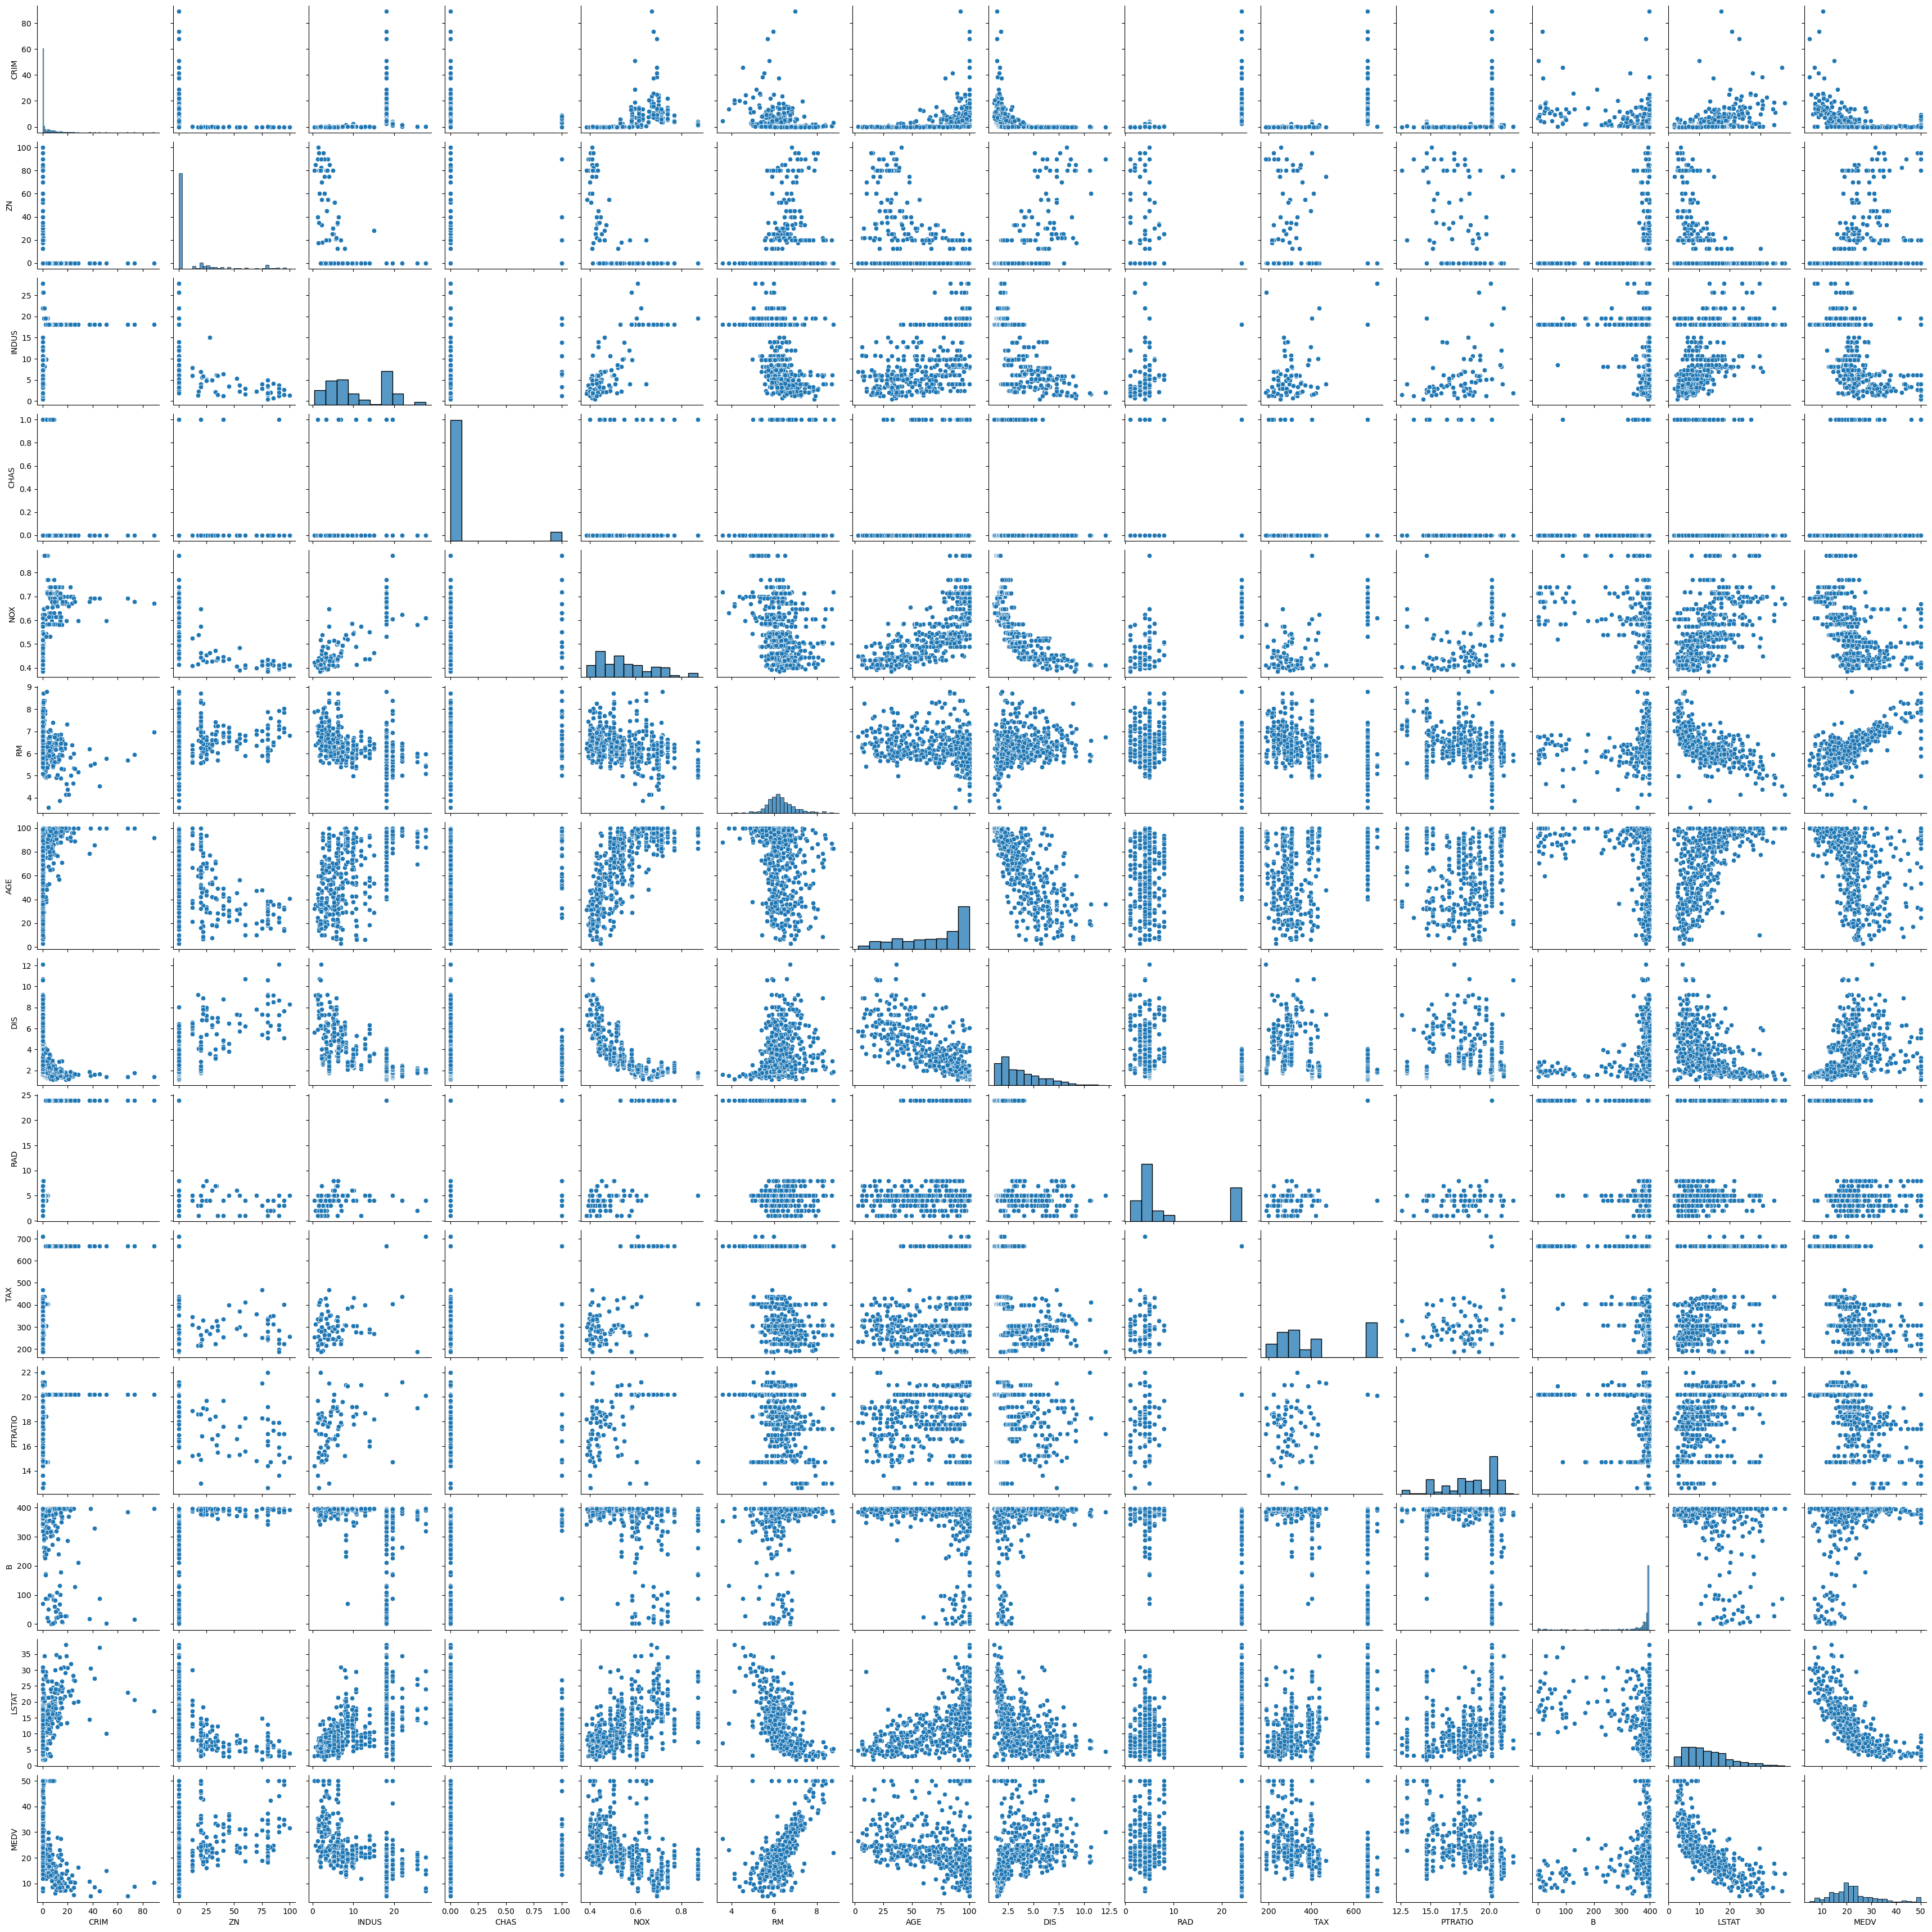

In [14]:
sns.pairplot(df)

<Axes: xlabel='RM', ylabel='MEDV'>

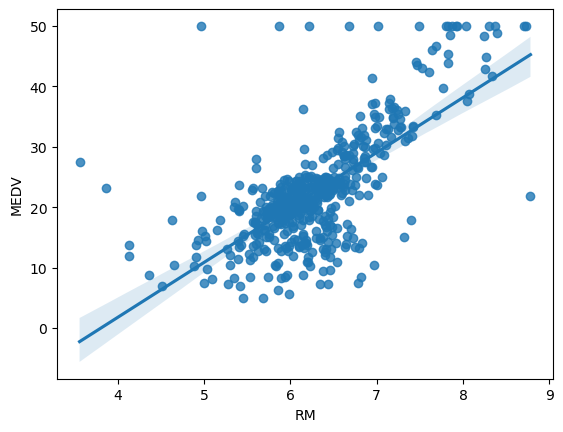

In [18]:
import seaborn as sns
import pandas as pd
sns.regplot(x='RM', y='MEDV', data=df)

<Axes: ylabel='Count'>

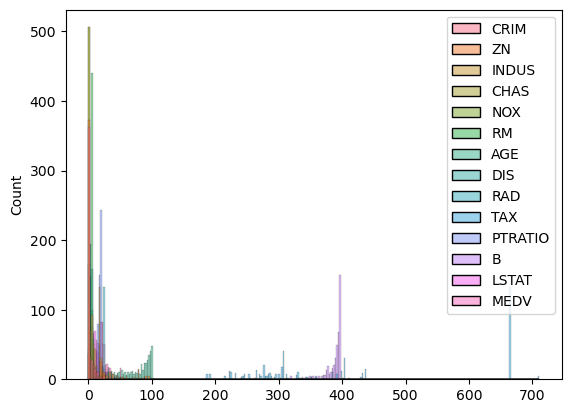

In [20]:
sns.histplot(df)

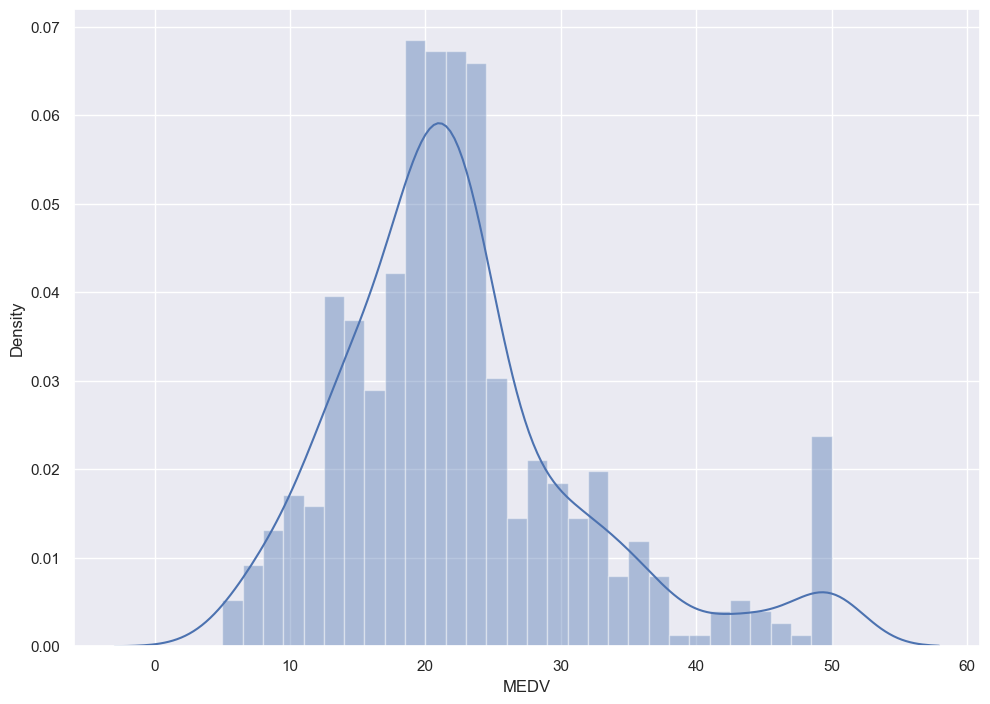

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["MEDV"],bins=30)
plt.show()

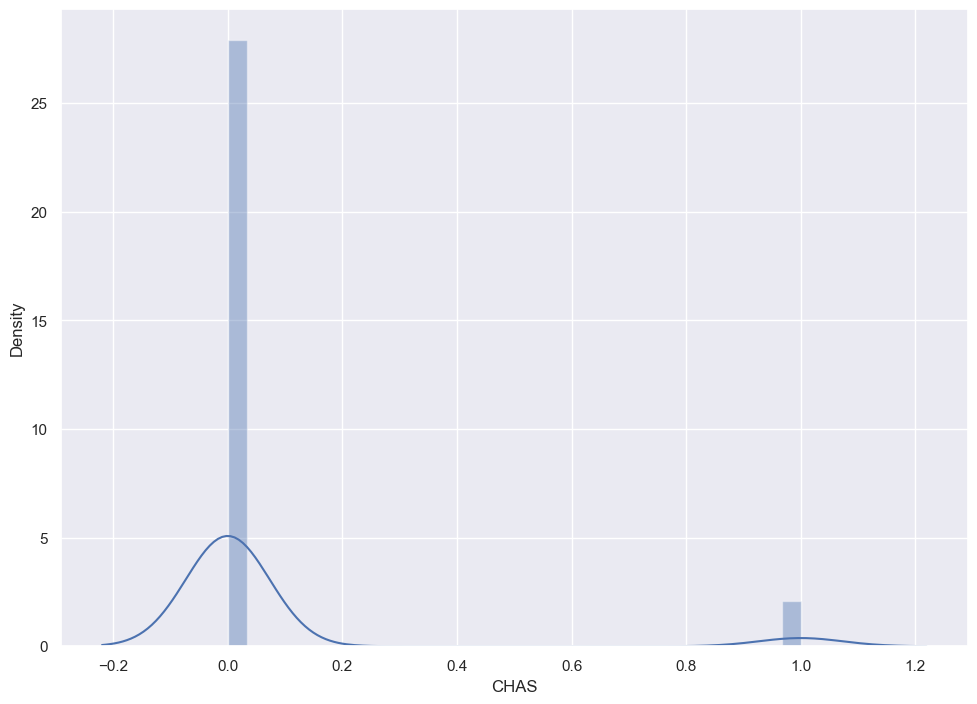

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['CHAS'],bins=30)
plt.show()

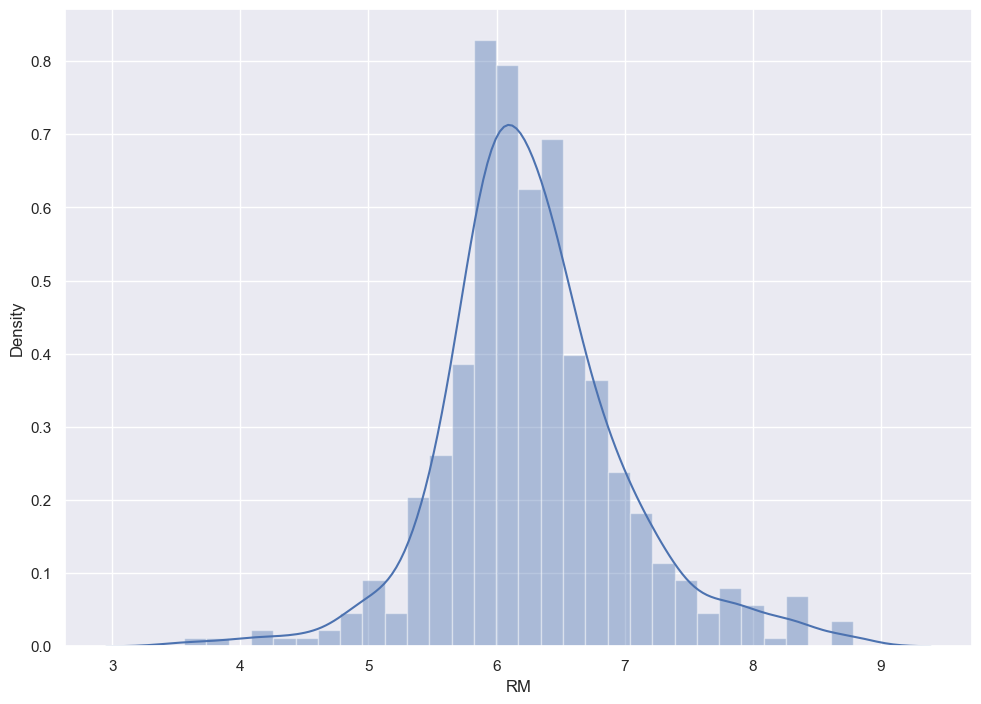

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['RM'],bins=30)
plt.show()

<Axes: >

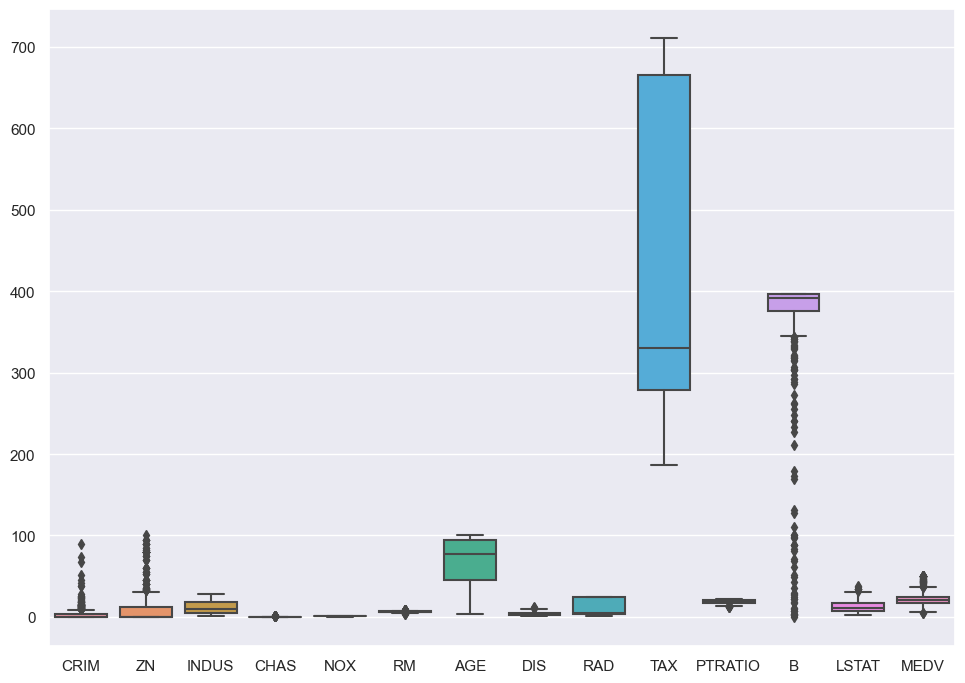

In [24]:
sns.boxplot(df)

In [25]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

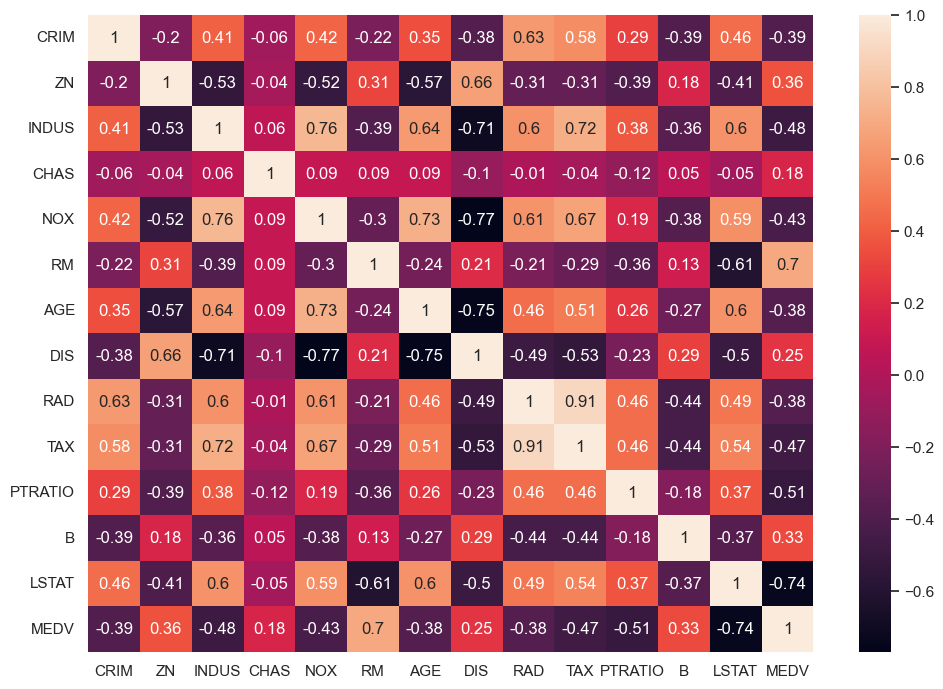

In [26]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [27]:
x = df.iloc[:,:-1]
y = df['MEDV']

In [28]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [32]:
lin_model = LinearRegression()

In [33]:
lin_model.fit(x_train,y_train)
lin_model.predict(x_test)

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

In [34]:
cvs = cross_val_score(lin_model,x,y,scoring = "neg_mean_squared_error",cv = 10)

In [35]:
print(cvs)
mean_cvs = np.mean(cvs)
print(mean_cvs)

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.705255944524815


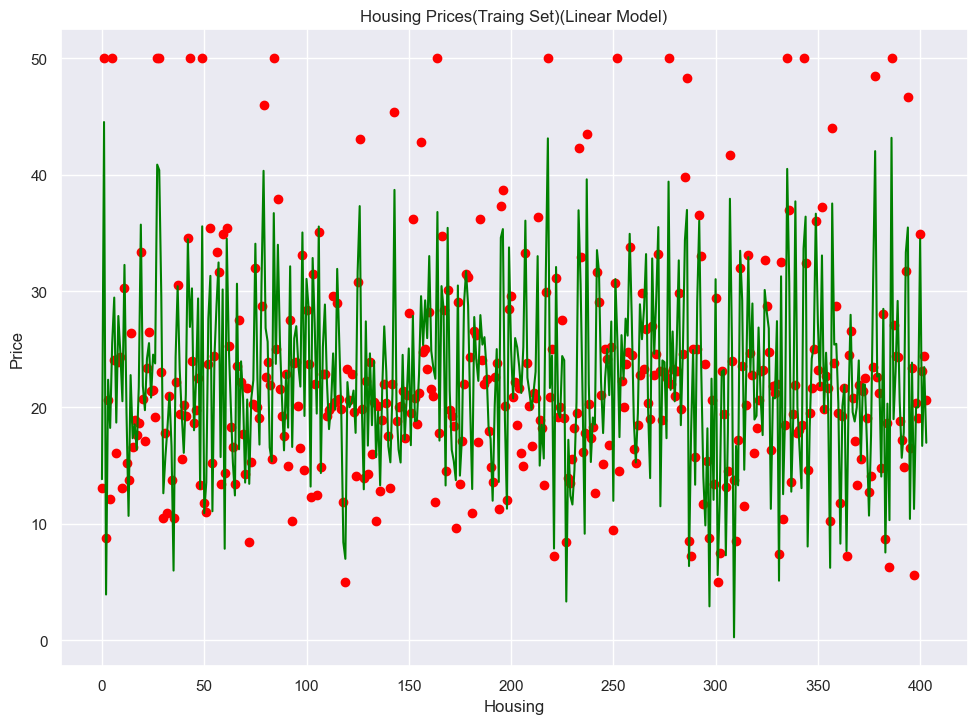

In [36]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1, lin_model.predict(x_train), color="green")
plt.title("Housing Prices(Traing Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [37]:
#ridge model
ridge=Ridge()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=10)

In [38]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [39]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

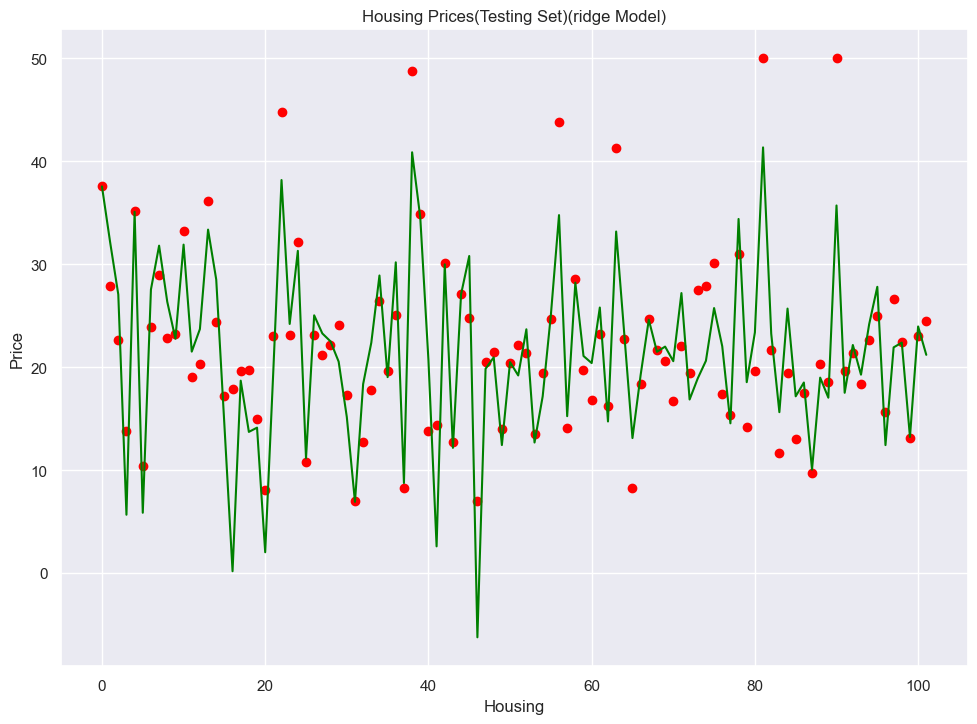

In [40]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1, ridge_model.predict(x_test), color="green")
plt.title("Housing Prices(Testing Set)(ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

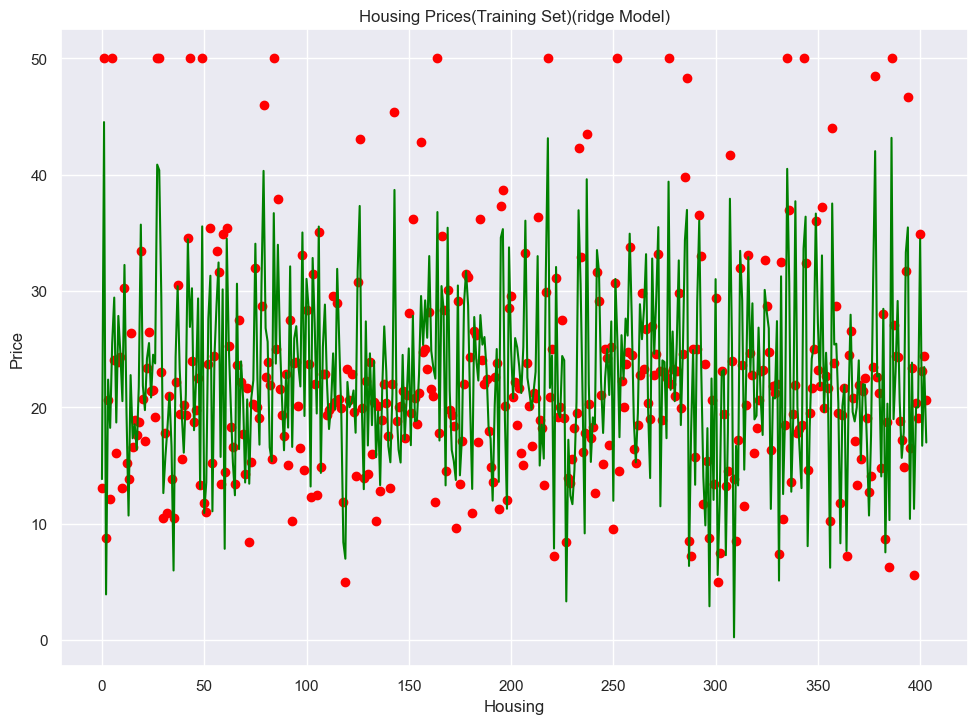

In [41]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1, ridge_model.predict(x_train), color="green")
plt.title("Housing Prices(Training Set)(ridge Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [42]:
#lasso model
lasso = Lasso()
params = {"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_model = GridSearchCV(lasso,params,scoring = "neg_mean_squared_error",cv=10)